# Campaign A/B Testing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
control_df = pd.read_csv('control_group.csv', sep=';')
control_df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
control_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null     object 
 1   Date                 30 non-null     object 
 2   Spend [USD]          30 non-null     int64  
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [4]:
control_df['Spend [USD]'] = control_df['Spend [USD]'].astype('float')

In [5]:
control_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null     object 
 1   Date                 30 non-null     object 
 2   Spend [USD]          30 non-null     float64
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(8), object(2)
memory usage: 2.5+ KB


In [6]:
control_df.describe()

,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
count,30.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,2288.433333,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.000000,522.793103
std,367.334451,21688.922908,21832.349595,1757.369003,866.089368,777.545469,407.457973,185.028642
min,1757.000000,71274.000000,42859.000000,2277.000000,1001.000000,848.000000,442.000000,222.000000
25%,1945.500000,92029.000000,74192.000000,4085.000000,1615.000000,1249.000000,930.000000,372.000000
50%,2299.500000,113430.000000,91579.000000,5224.000000,2390.000000,1984.000000,1339.000000,501.000000
75%,2532.000000,121332.000000,102479.000000,6628.000000,2711.000000,2421.000000,1641.000000,670.000000
max,3083.000000,145248.000000,127852.000000,8137.000000,4891.000000,4219.000000,1913.000000,800.000000


In [7]:
control_df.isna().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       1
Reach                  1
# of Website Clicks    1
# of Searches          1
# of View Content      1
# of Add to Cart       1
# of Purchase          1
dtype: int64

In [8]:
control_df.shape

(30, 10)

In [9]:
control_df.iloc[:2].head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280.0,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757.0,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0


In [10]:
control_df.iloc[:,3:]

,# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0
6,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0
7,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0
8,121332.0,94896.0,6198.0,2487.0,2179.0,645.0,501.0
9,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0


In [11]:
control_df.iloc[:,3:] = control_df.iloc[:,3:].fillna(control_df.iloc[:,3:].median())

In [12]:
control_df.isna().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64

In [13]:
control_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null     object 
 1   Date                 30 non-null     object 
 2   Spend [USD]          30 non-null     float64
 3   # of Impressions     30 non-null     float64
 4   Reach                30 non-null     float64
 5   # of Website Clicks  30 non-null     float64
 6   # of Searches        30 non-null     float64
 7   # of View Content    30 non-null     float64
 8   # of Add to Cart     30 non-null     float64
 9   # of Purchase        30 non-null     float64
dtypes: float64(8), object(2)
memory usage: 2.5+ KB


In [14]:
control_df['Date'] = pd.to_datetime(control_df['Date'], dayfirst=True)

In [15]:
control_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Campaign Name        30 non-null     object        
 1   Date                 30 non-null     datetime64[ns]
 2   Spend [USD]          30 non-null     float64       
 3   # of Impressions     30 non-null     float64       
 4   Reach                30 non-null     float64       
 5   # of Website Clicks  30 non-null     float64       
 6   # of Searches        30 non-null     float64       
 7   # of View Content    30 non-null     float64       
 8   # of Add to Cart     30 non-null     float64       
 9   # of Purchase        30 non-null     float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 2.5+ KB


In [16]:
corr_matrix = control_df.iloc[:,2:].corr()

<Axes: >

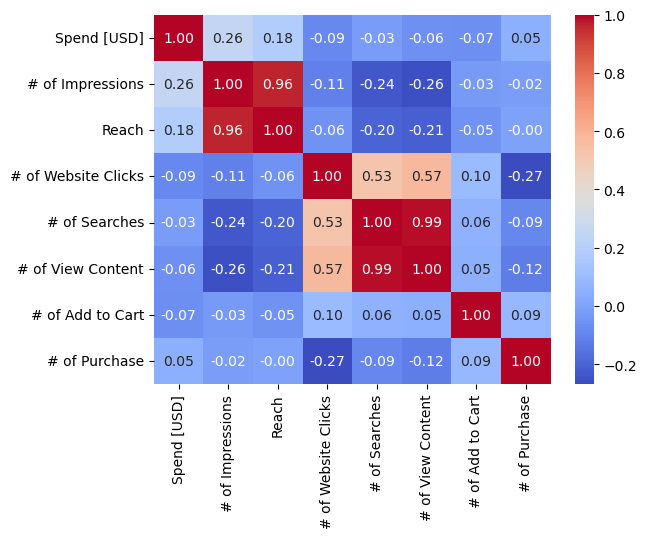

In [17]:
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

In [18]:
test_df = pd.read_csv("test_group.csv", sep=";")
test_df

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768
5,Test Campaign,6.08.2019,2458,42684,31489,7488,1854,1073,882,488
6,Test Campaign,7.08.2019,2838,53986,42148,4221,2733,2182,1301,890
7,Test Campaign,8.08.2019,2916,33669,20149,7184,2867,2194,1240,431
8,Test Campaign,9.08.2019,2652,45511,31598,8259,2899,2761,1200,845
9,Test Campaign,10.08.2019,2790,95054,79632,8125,2312,1804,424,275


In [19]:
test_df.shape

(30, 10)

In [20]:
test_df.isna().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64

In [21]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        30 non-null     object
 1   Date                 30 non-null     object
 2   Spend [USD]          30 non-null     int64 
 3   # of Impressions     30 non-null     int64 
 4   Reach                30 non-null     int64 
 5   # of Website Clicks  30 non-null     int64 
 6   # of Searches        30 non-null     int64 
 7   # of View Content    30 non-null     int64 
 8   # of Add to Cart     30 non-null     int64 
 9   # of Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


In [22]:
test_df.iloc[:,2:] = test_df.iloc[:,2:].astype('float')

In [23]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null     object 
 1   Date                 30 non-null     object 
 2   Spend [USD]          30 non-null     float64
 3   # of Impressions     30 non-null     float64
 4   Reach                30 non-null     float64
 5   # of Website Clicks  30 non-null     float64
 6   # of Searches        30 non-null     float64
 7   # of View Content    30 non-null     float64
 8   # of Add to Cart     30 non-null     float64
 9   # of Purchase        30 non-null     float64
dtypes: float64(8), object(2)
memory usage: 2.5+ KB


<Axes: >

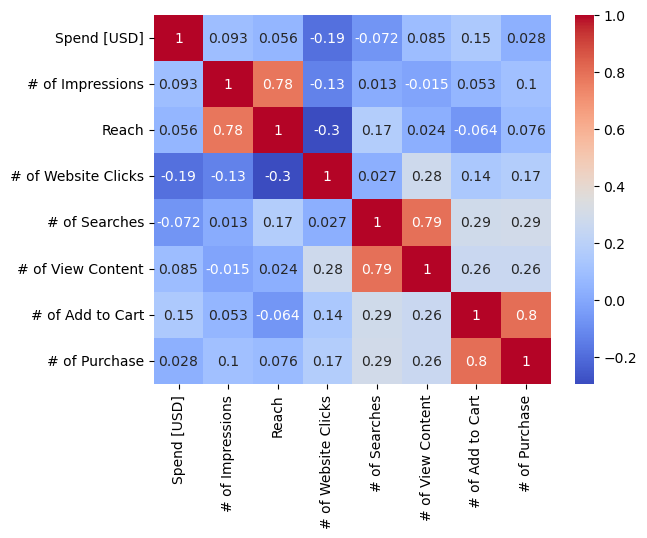

In [24]:
corr_matrix1 = test_df.iloc[:,2:].corr()
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm')

In [25]:
c_df = control_df.iloc[:,1:]
t_df = test_df.iloc[:,1:]

In [26]:
t_df['Date'] = pd.to_datetime(t_df['Date'], dayfirst=True)

In [27]:
c_df.mean()
t_df.mean()

Date                   2019-08-15 12:00:00
Spend [USD]                    2563.066667
# of Impressions                   74584.8
Reach                         53491.566667
# of Website Clicks            6032.333333
# of Searches                  2418.966667
# of View Content                   1858.0
# of Add to Cart                881.533333
# of Purchase                   521.233333
dtype: object

In [28]:
from scipy.stats import ttest_ind, norm

In [29]:
# lift

lift = (t_df.iloc[:,1:]-c_df.iloc[:,1:])/c_df.iloc[:,1:]
print(lift)

    Spend [USD]  # of Impressions     Reach  # of Website Clicks  \
0      0.319298         -0.521777 -0.370806            -0.566990   
1      0.446784         -0.167887 -0.110006            -0.425771   
2      0.009390         -0.466537 -0.592304             0.211586   
3      0.396907          0.076470 -0.576435             0.375530   
4      0.251771          0.007626  0.038863             0.122320   
5     -0.202725         -0.608677 -0.642162             0.858987   
6      0.115566         -0.620146 -0.670338             0.598864   
7      0.534737         -0.629763 -0.691047            -0.010468   
8     -0.057234         -0.624905 -0.667025             0.332527   
9      0.298278         -0.191883 -0.127387             2.568292   
10    -0.028112         -0.274315 -0.256221            -0.539142   
11     0.220785          0.068176 -0.894220             1.761109   
12    -0.268817         -0.205439 -0.273888             0.154715   
13     0.353067         -0.612360 -0.780987     

In [30]:
evaluation_metrics = [
    "# of Website Clicks",
    "# of Add to Cart",
    "# of Purchase",
    "# of View Content",
    "Reach",
]

std_control = c_df[evaluation_metrics].std()
std_test = t_df[evaluation_metrics].std()

In [31]:
print(std_control)

# of Website Clicks     1726.894156
# of Add to Cart         400.434518
# of Purchase            181.854040
# of View Content        764.057171
Reach                  21458.434279
dtype: float64


In [32]:
print(std_test)

# of Website Clicks     1708.567263
# of Add to Cart         347.584248
# of Purchase            211.047745
# of View Content        597.654669
Reach                  28795.775752
dtype: float64


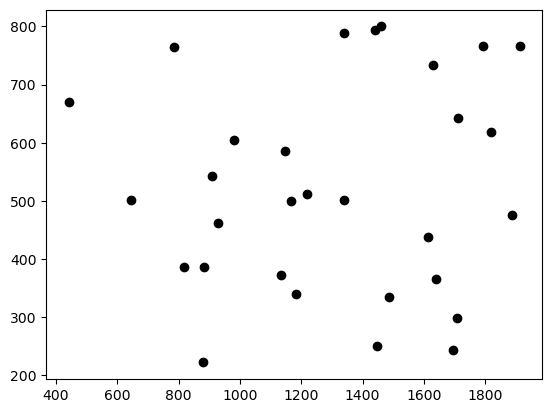

In [42]:
plt.scatter(x=c_df["# of Add to Cart"], y=c_df["# of Purchase"], color = 'black')
plt.show()

Click-Through Rate (CTR): CTR measures the percentage of users who clicked on an ad or link out of the total number of impressions. It can indicate the effectiveness of the campaign in capturing users' attention and driving them to take initial action.

Conversion Rate: Conversion Rate tracks the percentage of users who complete a desired action (like making a purchase) after clicking on an ad. It can indicate campaign's ability to turn clicks into actual outcomes, such as sales.

In [33]:
c_df['Conversion Rate'] = (c_df['# of Purchase'] / c_df['# of Website Clicks']) * 100

In [34]:
c_df['Conversion Rate'].head()

0     8.808438
1     6.300863
2     5.716042
3    11.092985
4     9.590352
Name: Conversion Rate, dtype: float64

In [43]:
c_df['CTR'] = (c_df['# of Website Clicks']/c_df['# of Impressions']) * 100
c_df['CTR'].head()

0    8.483471
1    6.700264
2    4.941121
3    4.205659
4    4.605484
Name: CTR, dtype: float64

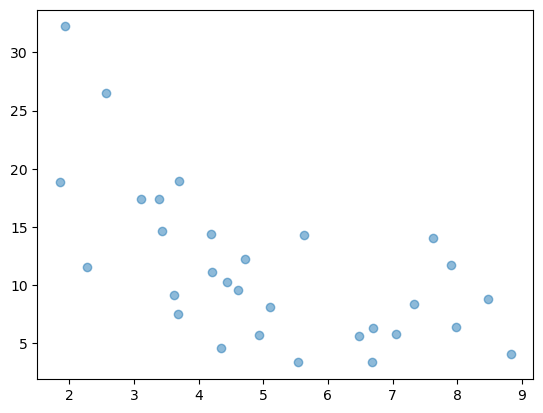

In [51]:
plt.scatter(x=c_df['CTR'], y=c_df['Conversion Rate'], alpha=0.5)
plt.show()